In [144]:
# 3. library(fpp2)의 books 데이터에는 같은 상점에서 문고판(Paperback)과 양장본(Hardback) 책의 일일 판매량이 있다.
# 문고판과 양장본 책의 다음 4일 판매량을 예측해보자. 

# (a) 시계열을 그리고 데이터의 주요 특징을 이야기해보라.
library(fpp2)
library(gridExtra)

head(books)

Time Series:
Start = 1 
End = 6 
Frequency = 1 
  Paperback Hardcover
1       199       139
2       172       128
3       111       172
4       209       139
5       161       191
6       119       168

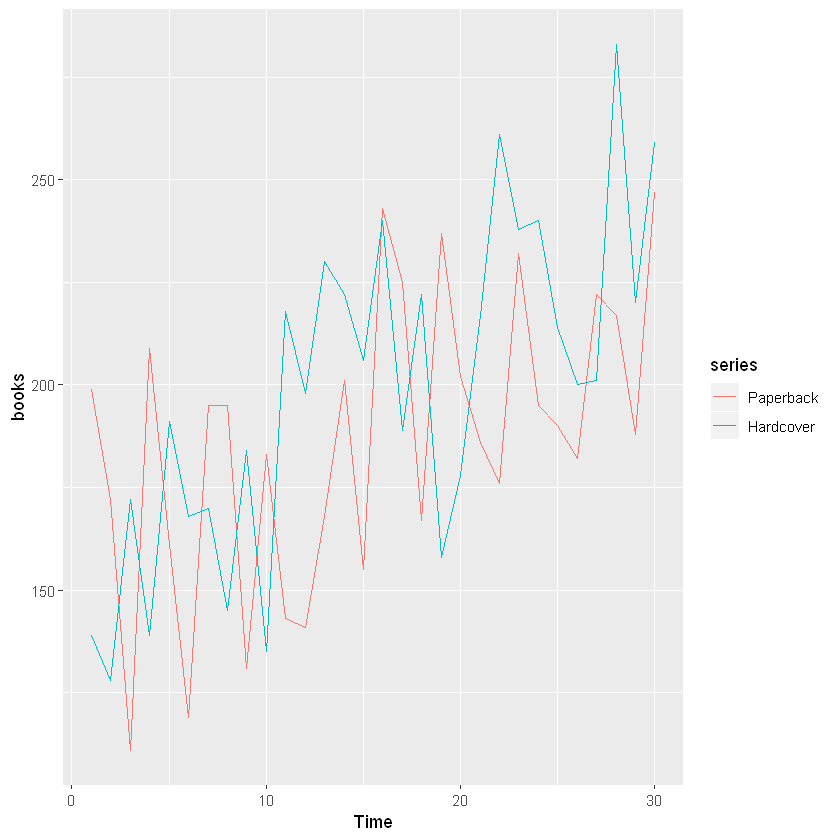

In [28]:
# https://otexts.com/fppkr/graphics-time-plots.html
autoplot(books, facets=FALSE)

ETS(A,N,N) 

Call:
 ets(y = books[, c("Paperback")]) 

  Smoothing parameters:
    alpha = 0.1684 

  Initial states:
    l = 170.8464 

  sigma:  34.8183

     AIC     AICc      BIC 
318.9747 319.8978 323.1783 

Training set error measures:
                   ME     RMSE      MAE       MPE     MAPE      MASE       ACF1
Training set 7.175298 33.63769 27.84179 0.4728668 15.57738 0.7020973 -0.2115923


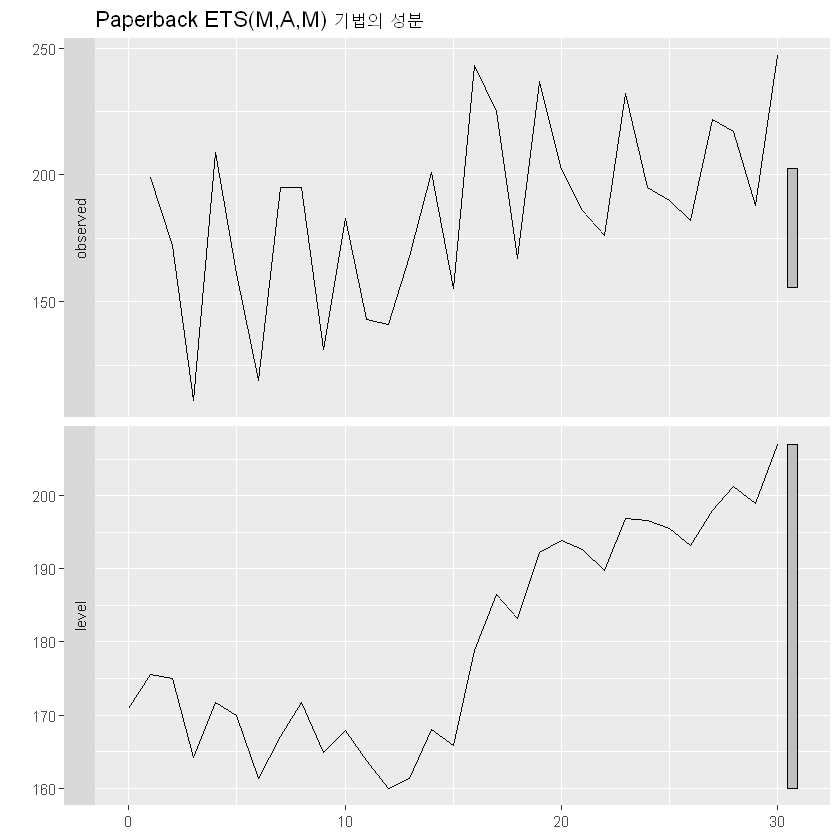

In [32]:
# Paperback
# https://otexts.com/fppkr/expsmooth-estimation-and-model-selection.html
fit <- ets(books[,c("Paperback")])
summary(fit)

autoplot(fit) + ggtitle("Paperback ETS(M,A,M) 기법의 성분")

ETS(M,A,N) 

Call:
 ets(y = books[, c("Hardcover")]) 

  Smoothing parameters:
    alpha = 1e-04 
    beta  = 1e-04 

  Initial states:
    l = 149.3465 
    b = 3.2554 

  sigma:  0.1462

    AIC    AICc     BIC 
309.583 312.083 316.589 

Training set error measures:
                     ME    RMSE      MAE       MPE     MAPE     MASE
Training set -0.9324569 27.2158 23.16246 -2.567635 12.23216 0.691061
                    ACF1
Training set -0.03280908


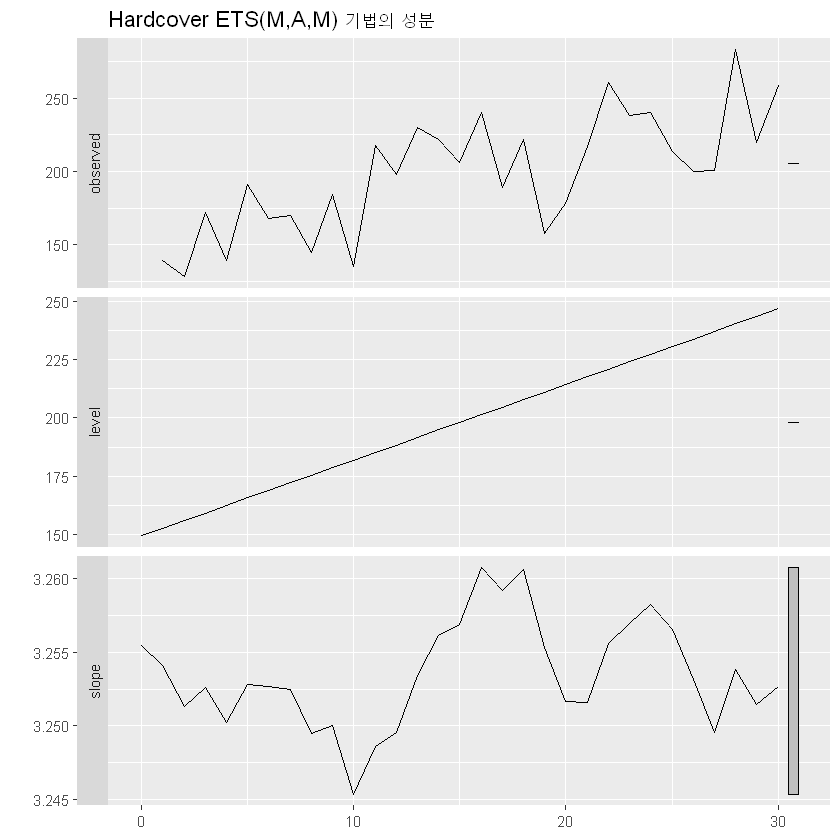

In [33]:
# Hardcover
fit <- ets(books[,c("Hardcover")])
summary(fit)
autoplot(fit) + ggtitle("Hardcover ETS(M,A,M) 기법의 성분")

In [55]:
# (b) Paperback과 Hardback 시계열에 홀트의 선형 기법을 적용해보고, 각각의 경우에 4일 예측값을 계산해보라.

# https://otexts.com/fppkr/holt.html
# 예측 함수는 더이상 평평하지 않고, 추세를 가집니다. h 단계 앞 예측은 마지막 추정 수준에 마지막 추정 추세값의  
# h 배 한 것을 더한 값입니다. 따라서 예측값은  h 의 선형 함수입니다.

holt(books[,c("Paperback")], h = 4)
holt(books[,c("Hardcover")], h = 4)

   Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
31       209.4668 166.6035 252.3301 143.9130 275.0205
32       210.7177 167.8544 253.5811 145.1640 276.2715
33       211.9687 169.1054 254.8320 146.4149 277.5225
34       213.2197 170.3564 256.0830 147.6659 278.7735

   Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
31       250.1739 212.7390 287.6087 192.9222 307.4256
32       253.4765 216.0416 290.9113 196.2248 310.7282
33       256.7791 219.3442 294.2140 199.5274 314.0308
34       260.0817 222.6468 297.5166 202.8300 317.3334

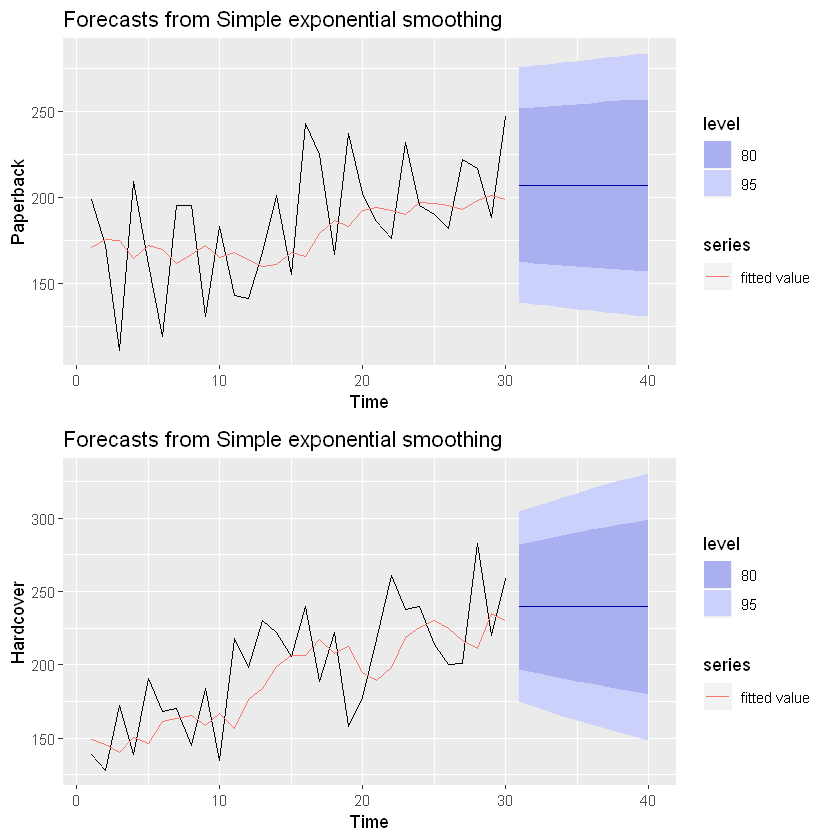

In [159]:
# (c) 두 시계열에 대해 단순지수평활과 Holt-Winters방법을 적용해보고 RMSE (혹은 SEE) 측정값을 비교해보라.
# 이러한 데이터에 대한 두 예측 기법의 장점을 기술해보라. 

# 단순 지수 평활 : https://otexts.com/fppkr/ses.html
paperback_ses <- ses(books[,c("Paperback")])
hardcover_ses <- ses(books[,c("Hardcover")])

p1 <- autoplot(paperback_ses) +
autolayer(fitted(paperback_ses), series = "fitted value") +
ylab("Paperback")

p2 <- autoplot(hardcover_ses) +
autolayer(fitted(hardcover_ses), series = "fitted value") +
ylab("Hardcover")

grid.arrange(p1, p2)

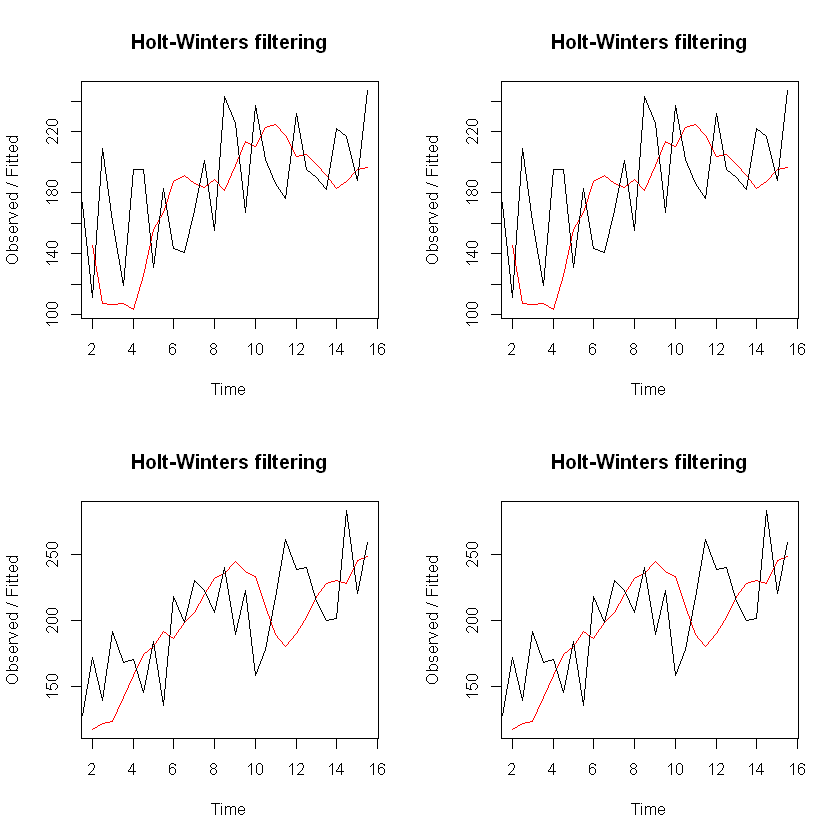

In [231]:
# Holt-Winters add & multiple
# https://otexts.com/fppkr/holt-winters.html

# The time series should have frequency greater than 1. Therefore frequency = 2
books_paperback <- window(ts(books[,c("Paperback")], start = 1, frequency = 2))
par(mfrow=c(2,2)) 
plot(HoltWinters(books_paperback, seasonal="additive", beta = T, gamma = F))
plot(HoltWinters(books_paperback, seasonal="multiplicative", beta = T, gamma = F))

books_hardcover <- window(ts(books[,c("Hardcover")], start = 1, frequency = 2))
plot(HoltWinters(books_hardcover, seasonal="additive", beta = T, gamma = F))
plot(HoltWinters(books_hardcover, seasonal="multiplicative", beta = T, gamma = F))

In [211]:
# 단순 지수 평활 RMSE (혹은 SEE) 측정값
cat("[Paperback Simple Exponential Smoothing]")
round(accuracy(paperback_ses), 2)

cat("[Hardcover Simple Exponential Smoothing]")
round(accuracy(hardcover_ses), 2)

[Paperback Simple Exponential Smoothing]

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,7.18,33.64,27.84,0.47,15.58,0.7,-0.21


[Hardcover Simple Exponential Smoothing]

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,9.17,31.93,26.77,2.64,13.39,0.8,-0.14


In [210]:
# Holt-Winters RMSE (혹은 SEE) 측정값
cat("[Paperback HW Additive]")
round(accuracy(paperback_hw_add), 2)

cat("[Paperback HW Multiplicative]")
round(accuracy(paperback_hw_mul), 2)

cat("[Hardcover HW Additive]")
round(accuracy(hardcover_hw_add), 2)

cat("[Hardcover HW Multiplicative]")
round(accuracy(hardcover_hw_mul), 2)

[Paperback HW Additive]

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-4.09,31.1,26.04,-5.69,15.51,0.63,-0.17


[Paperback HW Multiplicative]

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-5.35,31.25,26.3,-6.39,15.76,0.63,-0.17


[Hardcover HW Additive]

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.04,27.19,23.12,-2.05,12.15,0.78,-0.03


[Hardcover HW Multiplicative]

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.87,27.16,22.92,-3.03,12.23,0.77,-0.03


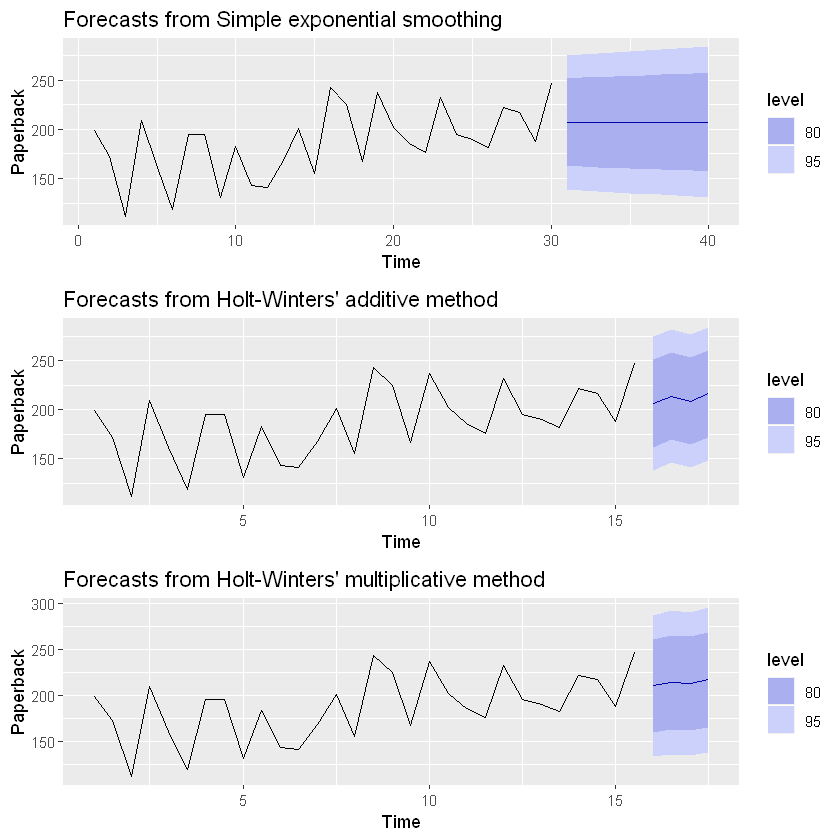

In [142]:
# (d) 두 기법 다 사용하여 두 시계열에 대한 예측값을 계산해보고 어떤 것이 좋다고 생각하는지 기술하라.
# https://otexts.com/fppkr/ses.html : 단순 지수 평활
# https://otexts.com/fppkr/ets-forecasting.html : ETS

p1 <- autoplot(paperback_ses) + ylab("Paperback")

p2 <- bp_fit_add %>% forecast(h = 4) %>%
    autoplot() + ylab("Paperback")

p3 <- bp_fit_mul %>% forecast(h = 4) %>%
    autoplot() + ylab("Paperback")

grid.arrange(p1, p2, p3)

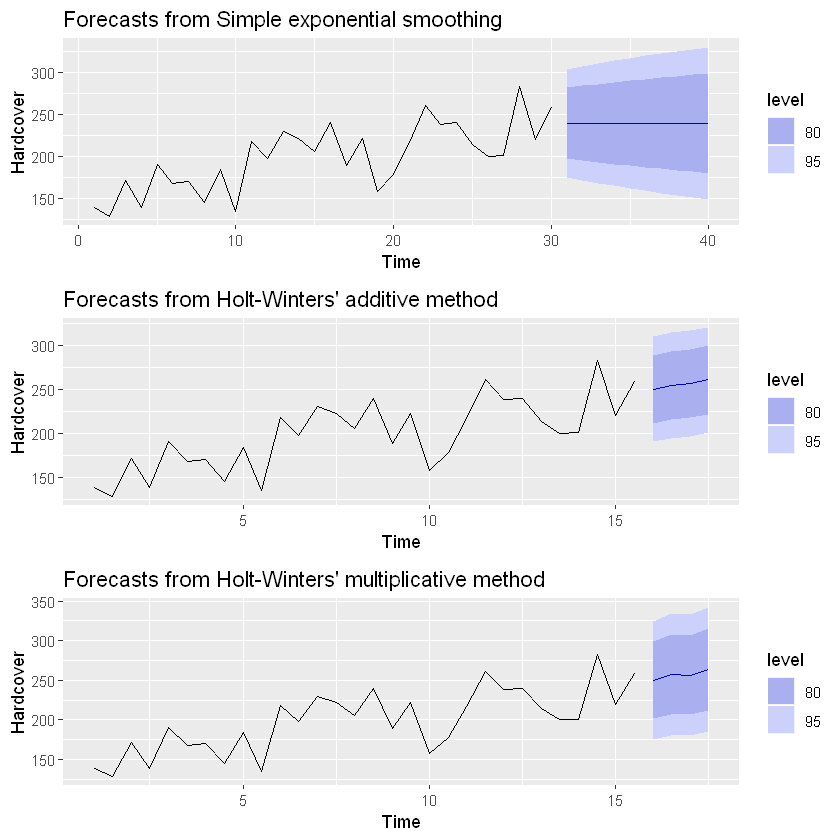

In [158]:
# https://otexts.com/fppkr/ses.html : 단순 지수 평활
# https://otexts.com/fppkr/ets-forecasting.html : ETS

p1 <- autoplot(hardcover_ses) + ylab("Hardcover")

p2 <- bh_fit_add %>% forecast(h = 4) %>%
    autoplot() + ylab("Hardcover")

p3 <- bh_fit_mul %>% forecast(h = 4) %>%
    autoplot() + ylab("Hardcover")

grid.arrange(p1, p2, p3)